In [1]:
from typing import TypedDict, List
from langgraph.graph import StateGraph

In [2]:
class AgentState(TypedDict):
    name: str
    age: str
    final: str
    

In [5]:
def first_node(state: AgentState) -> AgentState:
    """
    This is first node of the sequence
    """
    state['final'] = f"Hi {state['name']}!"
    return state


def second_node(state: AgentState) -> AgentState:
    """
    This is second node of the sequence
    """
    state['final'] += f" You are {state['age']} years old."
    return state

In [6]:
graph = StateGraph(AgentState)
graph.add_node("first_node", first_node)
graph.add_node("second_node", second_node)

graph.set_entry_point("first_node")
graph.add_edge("first_node", "second_node")
graph.set_finish_point("second_node")

app = graph.compile()

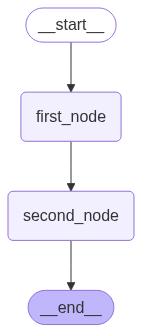

In [7]:
from IPython.display import display, Image
display(Image(app.get_graph().draw_mermaid_png()))

In [8]:
app.invoke({
    "name": "nikhil",
    "age": 21
})

{'name': 'nikhil', 'age': 21, 'final': 'Hi nikhil! You are 21 years old.'}

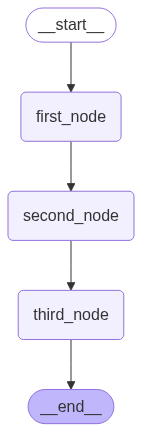

In [14]:
from typing import TypedDict, List
from langgraph.graph import StateGraph

class AgentState(TypedDict):
    name: str
    age: int
    skills: List[str]
    message: str

def first_node(state: AgentState) -> AgentState:
    """
    This is first node function will return the name
    """
    state["message"] = f"{state['name']}, welcome to the system!"
    return state

def second_node(state: AgentState) -> AgentState:
    """
    This is second node function will return the age
    """
    state['message'] += f" You are {state['age']} years old!"
    return state

def third_node(state: AgentState) -> AgentState:
    """
    This is third node function will return skills
    """
    add_state = ", ".join(state['skills'][:-1])+ ", and " + state['skills'][-1]
    state['message'] += f" You have skills in: {add_state}"
    return state
    
graph = StateGraph(AgentState)
graph.add_node("first_node", first_node)
graph.add_node("second_node", second_node)
graph.add_node("third_node", third_node)
graph.set_entry_point("first_node")
graph.set_finish_point("third_node")
graph.add_edge("first_node", "second_node")
graph.add_edge("second_node", "third_node")
app = graph.compile()

from IPython.display import display, Image
display(Image(app.get_graph().draw_mermaid_png()))

In [15]:
app.invoke({"name": "John", "age": 30, "skills": ["Python", "Machine Learning", "LangGraph"]})

{'name': 'John',
 'age': 30,
 'skills': ['Python', 'Machine Learning', 'LangGraph'],
 'message': 'John, welcome to the system! You are 30 years old! You have skills in: Python, Machine Learning, and LangGraph'}